In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sample_submission.csv")

In [3]:
df.head()

,id,loan_paid_back
0,593994,0
1,593995,0
2,593996,0
3,593997,0
4,593998,0


In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
train_data.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [7]:
clear_data = train_data[['id','annual_income','debt_to_income_ratio','interest_rate','employment_status','loan_amount','credit_score','loan_paid_back']]

In [8]:
train_data['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

In [9]:
correlation = train_data['loan_amount'].corr(train_data['loan_paid_back'])

In [10]:
correlation

np.float64(-0.003762185458822357)

In [11]:
clear_data_df = pd.DataFrame(clear_data)

In [12]:
clear_data_df.head()

,id,annual_income,debt_to_income_ratio,interest_rate,employment_status,loan_amount,credit_score,loan_paid_back
0,0,29367.99,0.084,13.67,Self-employed,2528.42,736,1.0
1,1,22108.02,0.166,12.92,Employed,4593.10,636,0.0
2,2,49566.20,0.097,9.76,Employed,17005.15,694,1.0
3,3,46858.25,0.065,16.10,Employed,4682.48,533,1.0
4,4,25496.70,0.053,10.21,Employed,12184.43,665,1.0


In [13]:
clear_data_df['employment_status'].value_counts()

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

In [14]:
clear_data_df['employment_status_code'] = clear_data_df['employment_status'].astype('category').cat.codes
correlation = clear_data_df['employment_status_code'].corr(clear_data_df['loan_paid_back'])

In [15]:
correlation = clear_data_df.drop(columns=['employment_status']).corr()

In [16]:
correlation

,id,annual_income,debt_to_income_ratio,interest_rate,loan_amount,credit_score,loan_paid_back,employment_status_code
id,1.000000,0.000775,-0.001679,-0.001020,-0.001973,0.001772,0.001387,-0.000940
annual_income,0.000775,1.000000,0.000553,-0.002507,-0.003407,0.001509,0.006326,-0.001569
debt_to_income_ratio,-0.001679,0.000553,1.000000,0.030316,-0.008236,-0.061617,-0.335680,0.153695
interest_rate,-0.001020,-0.002507,0.030316,1.000000,-0.001174,-0.538335,-0.131184,0.040861
loan_amount,-0.001973,-0.003407,-0.008236,-0.001174,1.000000,-0.005761,-0.003762,0.005751
credit_score,0.001772,0.001509,-0.061617,-0.538335,-0.005761,1.000000,0.234560,-0.079260
loan_paid_back,0.001387,0.006326,-0.335680,-0.131184,-0.003762,0.234560,1.000000,-0.585304
employment_status_code,-0.000940,-0.001569,0.153695,0.040861,0.005751,-0.079260,-0.585304,1.000000


In [17]:
clear_data_df.groupby('employment_status')['loan_paid_back'].mean()*100

employment_status
Employed         89.414506
Retired          99.720416
Self-employed    89.845655
Student          26.351521
Unemployed        7.761863
Name: loan_paid_back, dtype: float64

In [18]:
clear_data_df['loan_paid_back']= clear_data_df['loan_paid_back'].astype(int)

In [19]:
clear_data_df

,id,annual_income,debt_to_income_ratio,interest_rate,employment_status,loan_amount,credit_score,loan_paid_back,employment_status_code
0,0,29367.99,0.084,13.67,Self-employed,2528.42,736,1,2
1,1,22108.02,0.166,12.92,Employed,4593.10,636,0,0
2,2,49566.20,0.097,9.76,Employed,17005.15,694,1,0
3,3,46858.25,0.065,16.10,Employed,4682.48,533,1,0
4,4,25496.70,0.053,10.21,Employed,12184.43,665,1,0
...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,10.92,Employed,20958.37,703,1,0
593990,593990,35289.43,0.105,14.62,Employed,3257.24,559,1,0
593991,593991,47112.64,0.072,14.13,Employed,929.27,675,1,0
593992,593992,76748.44,0.067,9.87,Employed,16290.40,740,1,0


In [20]:
categorical_features = clear_data_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)

['employment_status']


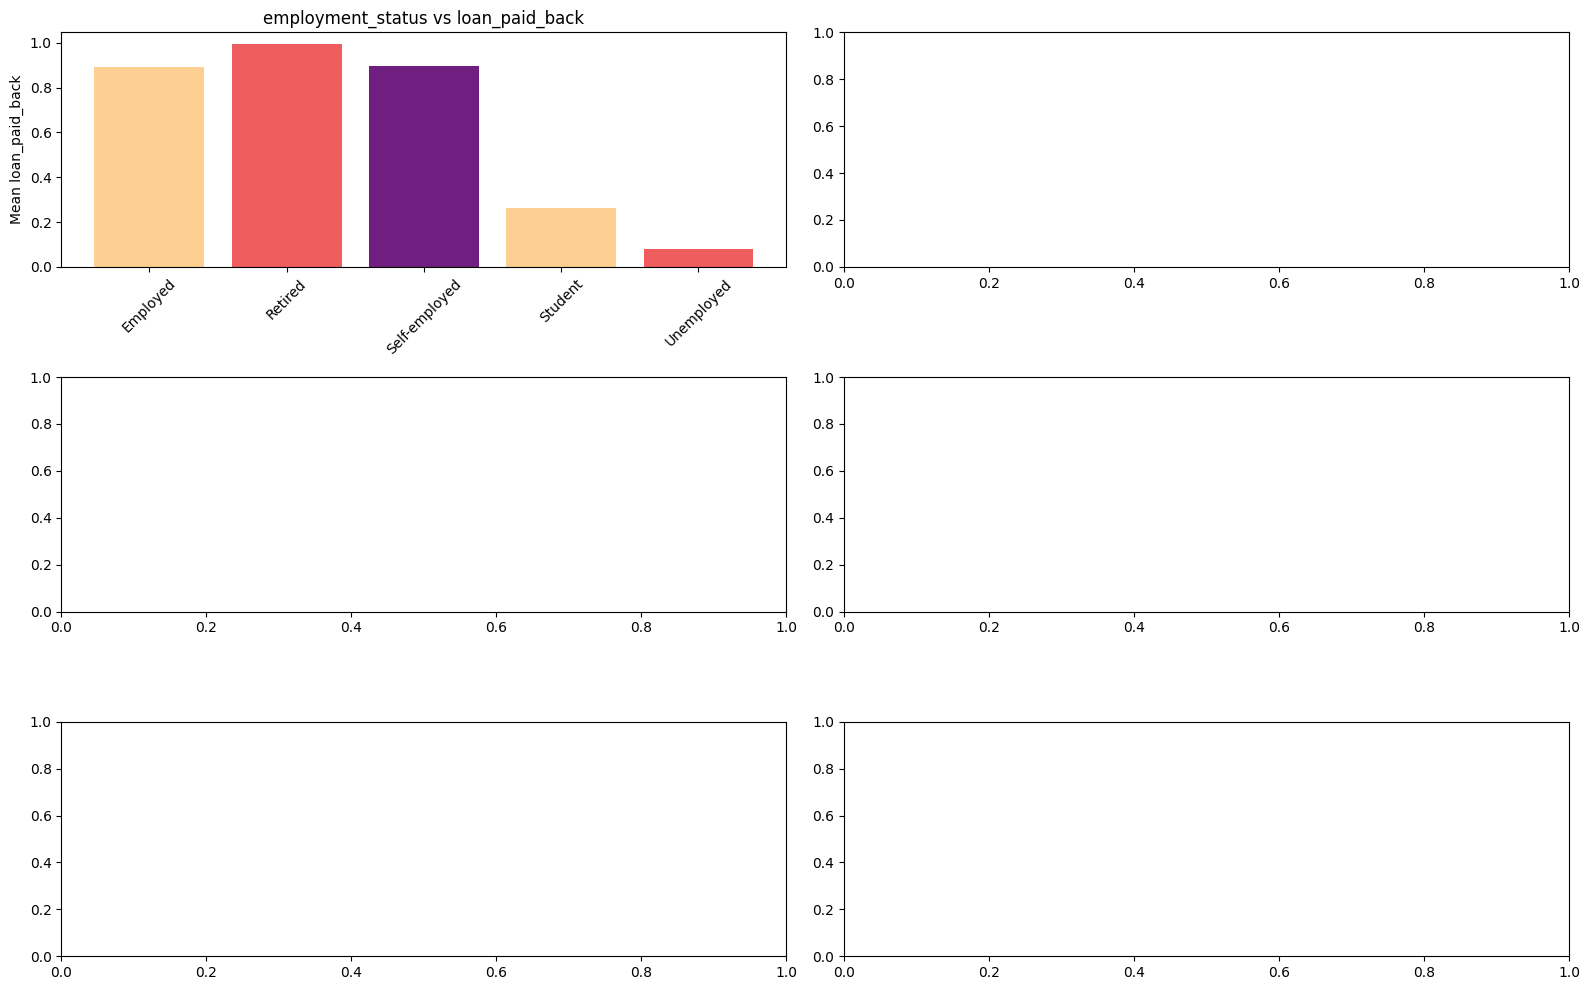

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# A more compact view of categorical features vs the target
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
axes = axes.flatten()
cmap = plt.get_cmap('magma')
colors = cmap([0.9, 0.66, 0.33])
target = 'loan_paid_back'

for i, col in enumerate(categorical_features):
    grouped = clear_data_df.groupby(col)[target].mean()
    axes[i].bar(grouped.index.astype(str), grouped.values, color=colors)
    axes[i].set_ylabel(f'Mean {target}')
    axes[i].set_title(f'{col} vs {target}')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [22]:
###will continue from here later###